In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [3]:
#reading our dataset which contains features and labels whether product is genuine or fake
product_data = pd.read_csv("fake_product_dataset.csv")

In [4]:
#dropping all null values of our dataset
product_data.dropna(inplace=True)

In [5]:
label_map = {False: 0, True: 1}
df = product_data['is_authentic'].map(label_map)

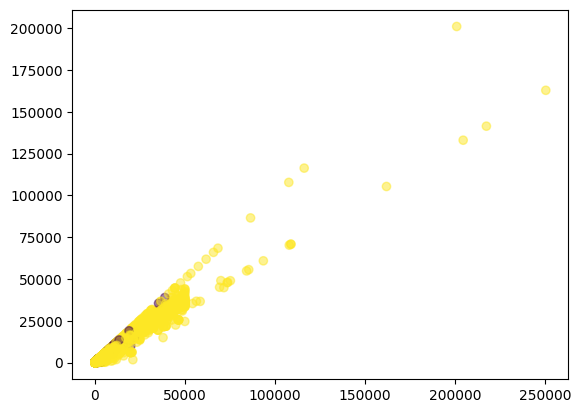

In [6]:
plt.scatter(product_data['retail_price'], product_data['discounted_price'], c=df, alpha=0.5)

In [7]:
#defining features and labels of our product
features = product_data[['retail_price', 'discounted_price']]

In [8]:
labels = product_data['is_authentic']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [10]:
model = LogisticRegression()

In [11]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
accuracy = model.score(X_test, y_test)*100
print("Model accuracy:", accuracy)

Model accuracy: 96.28600303183426


In [14]:

# Example user input:
user_input = pd.DataFrame({
  "retail_price": [100],
  "discounted_price": [80]
})

In [15]:
# Make a prediction
product_genuine = model.predict(user_input)

In [16]:
print(product_genuine)

[ True]


In [17]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)